<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一維資料

In [1]:
from typing import List,Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point:float,bucket_size:float)->float:
  """以floor的方式取整數，作為bucket_size的倍數"""
  return bucket_size * math.floor(point/bucket_size)

def make_histogram(points:List[float],bucket_size:float)->Dict[float,int]:
  """針對資料點進行分組，並計算每個分組各有幾個資料點"""
  return Counter(bucketize(point,bucket_size) for point in points)

def plot_histogram(points:List[float],bucket_size:float,title:str=""):
  histogram = make_histogram(points,bucket_size)
  plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
  plt.title(title)

考慮以下兩組資料

In [2]:
import random

def normal_cdf(x:float,mu:float=0,sigma:float=1)->float:
  return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2
  
def inverse_normal_cdf(p:float,
            mu:float = 0,
            sigma:float=1,
            tolerance:float=0.00001) -> float:
  # 如果不是標準常態分佈，就先轉換成標準常態分佈
  if mu != 0 or sigma != 1:
    return mu + sigma*inverse_normal_cdf(p,tolerance = tolerance)
  
  low_z = -10.0 # normal_cdf(-10)是(趨近於) 0
  hi_z =  10.0 # normal_cdf(10)是(趨近於) 1
  while hi_z - low_z > tolerance:  
    mid_z = (low_z + hi_z) / 2   # 計算出中間值
    mid_p = normal_cdf(mid_z)     # 以及累積分佈函數在該處所應對的值
    if mid_p < p :
      low_z = mid_z        #中間的值太低，就往上繼續搜尋
    else:
      hi_z = mid_z        #中間的值太高，就往下繼續搜尋
  
  return mid_z

random.seed(0)

#介於-100到100之間的均勻分布
uniform= [200* random.random()-100 for _ in range(10000)]


#平均值0、標準差57的常態分佈
normal= [57* inverse_normal_cdf(random.random()) for _ in range(10000)]

### 圖10-1 均勻分布的直方圖



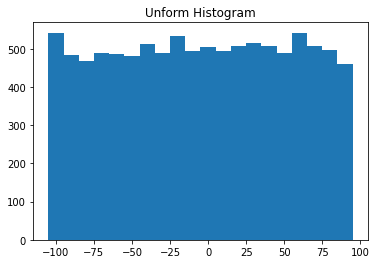

In [3]:
plot_histogram(uniform,10,"Unform Histogram")

### 圖10-2 常態分布的直方圖


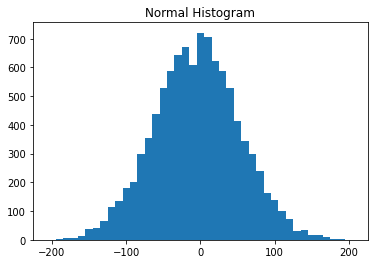

In [4]:
plot_histogram(normal,10,"Normal Histogram")

# 二維的資料

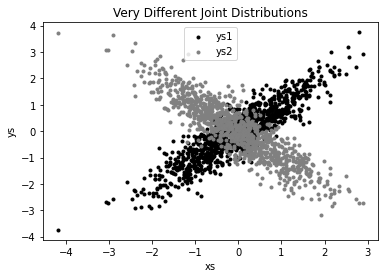

In [5]:
def random_normal()->float:
  """送回一個從標準常態分布中隨機選取的是數字"""
  return inverse_normal_cdf(random.random())

xs=[random_normal() for _ in range(1000)]
ys1 = [x+random_normal()/2 for x in xs]
ys2 = [-x+random_normal()/2 for x in xs]

plt.scatter(xs,ys1,marker=".",color="black",label="ys1")
plt.scatter(xs,ys2,marker=".",color="gray",label="ys2")
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

使用「第五章 統計學」的函數

In [6]:
import math
from typing import List
Vector = List[float]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def mean(xs:List[float]) -> float:
  return sum(xs) / len(xs)

def de_mean(xs:List[float]) -> List[float]:
  x_bar = mean(xs)
  return [x - x_bar for x in xs] 

def standard_deviation(xs:List[float]) ->float:
  return math.sqrt(variance(xs))

def covariance(xs:List[float],ys:List[float]) ->float:
  assert len(xs)==len(ys),"xs與ys的元素必須是相同的0"
  
  return dot(de_mean(xs),de_mean(ys))/(len(xs)-1)

def variance(xs:List[float]) ->float:
  assert len(xs),"至少有兩個元素才能計算變異數"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n-1)


def correlation(xs:List[float],ys:List[float]) ->float:

  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0 :
    return covariance(xs,ys) / stdev_x / stdev_y
  else:
    return 0

In [7]:
print(correlation(xs,ys1))
print(correlation(xs,ys2))

0.9010493686379609
-0.8920981526880033


# 多維的資料
利用對應的相關矩陣(correlation matrix)找出對應的相關係數

使用「第4章 線性代數」的函數

In [8]:
from typing import List

Vector = List[float]
Matrix=List[List[float]] #另一種型別別名

from typing import Callable

#送回一個num_rows * num_cols 的矩陣，其中第(i,j)項就是entry_fn(i,j)
def make_matrix(num_rows:int,num_cols:int,entry_fn:Callable[[int,int],float])->Matrix:

  return [[ entry_fn(i,j)        # 給定 i ，就能建立長度為 j 的列表
        for j in range(num_cols)] # [entry_fn(i,0),...]
        for i in range(num_rows)] # 針對每個i都建立一個列表

In [9]:
def correlation_matrix(data:List[Vector])->Matrix:
  """
  送回一個len(data[i]) x len(data[j])的矩陣，
  其中第(i,j)個元素值，就代表data[i]、data[j]的相關係數
  """
  def correlation_ij(i:int,j:int)->float:
    return correlation(data[i],data[j])
  
  return make_matrix(len(data),len(data),correlation_ij)

利用散點圖矩陣將兩兩成對的散點圖全部顯現出來

In [10]:
from typing import List

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)    # each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

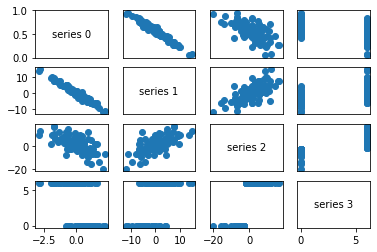

In [11]:
#corr_data是一個list列表，內有四個100維向量
num_vectors = len(corr_data)
fig,ax= plt.subplots(num_vectors,num_vectors)

for i in range(num_vectors):
  for j in range(num_vectors):

    # 散點圖：column_j在x軸，column_i在y軸
    if i != j:ax[i][j].scatter(corr_data[j],corr_data[i])

    #如果i==j，就顯示序列名稱
    else:ax[i][j].annotate("series "+str(i),(0.5,0.5),xycoords="axes fraction",ha="center",va="center")

    #除了左邊和下面的圖形之外，隱藏軸上的標籤
    if i<num_vectors-1:ax[i][j].xaxis.set_visible(False)
    if j>0:ax[i][j].yaxis.set_visible(False)
  
  # 修正左上方與右下方圖形軸的標籤
  # 因為這些圖形裡只有文字
  ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
  ax[-1][-1].set_ylim(ax[0][-1].get_ylim())

plt.show()

# 使用NamedTuple


In [12]:
import datetime

stock_price={
    "closing_price":102.96,
    "date":datetime.date(2014,8,29),
    "symbol":"AAPL"
}

我們常使用dict來儲存資料， 
藉由dict的鍵值來進行存取很容易出現問題。  
如果dict內的資料型別具有一致性，能採用以下型態標註：


```
prices:Dict[datetime.date,float]={ }
```



In [13]:
from collections import namedtuple

StockPrice=namedtuple('StockPrice',["symbol","date","closing_price"])
price = StockPrice("MSFT",datetime.date(2018,12,14),106.03)

assert price.symbol =="MSFT"
assert price.closing_price == 106.03

使用定義物件的方式，藉此達到型別標註。

In [21]:
from typing import NamedTuple

class StockPrice(NamedTuple):
  symbol:str
  date:datetime.date
  closing_price:float

  def is_high_tech(self) ->bool:
    """一個物件方法"""
    return self.symbol in ["MIST","GOOG","FB","AMZN","AAPL"]

price = StockPrice('MSFT',datetime.date(2018,12,14),106.03)

assert price.symbol == "MSFT"
assert price.closing_price == 106.03
assert price.is_high_tech() == False

## Dataclass 資料物件類別
可被視為NamedTuple的一種可變類別

In [22]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
  symbol:str
  date:datetime.date
  closing_price:float

  def is_high_tech(self) ->bool:
    """一個物件方法"""
    return self.symbol in ["MIST","GOOG","FB","AMZN","AAPL"]

price2 = StockPrice2('MSFT',datetime.date(2018,12,14),106.03)

assert price2.symbol == "MSFT"
assert price2.closing_price == 106.03
assert price2.is_high_tech() == False

在這個物件形式的保護下，不能直接修改參數

In [23]:
price2.closing_price /= 2
assert price2.closing_price == 51.03

AssertionError: ignored

# 清理與轉換

# 處理資料

# 尺度調整

## tqdm

# 降減維度